<a href="https://colab.research.google.com/github/regina-fonseca-avila/data_science/blob/main/graficos/waterfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://cdn.pixabay.com/photo/2021/11/30/00/42/waterfall-6834141_1280.png"
     style="display: block; margin: auto; max-width: 100%;">
</center>

# **WATERFALL PLOT**

Inspirado no gráfico apresentado no video [Make waterfall charts in Excel (the EASY way!)](https://www.youtube.com/watch?v=7_n_HffdaxM).



# Referências

[1] [Waterfall Charts in Python](https://www.geeksforgeeks.org/data-visualization/waterfall-charts-in-python/) geeksforgeek

[2] [Waterfall Plot in Python](https://https://www.machinelearningplus.com/waterfall-plot-in-python/) machine learning plus

A referência [1] traz versões de gráficos waterfall feitos com matplotlib e plotly. A referência [2] traz na seção "Analyzing a waterfall chart" explica como interpretar um waterfall. É interessante olhar porque ela apresenta um gráfico com valores por quarter e incluí uma barra com os valore no meio do ano.

Partindo do gráfico na seção "Customizing the Waterfall Chart Using Python" da referência [1] foi construído construído o gráfico waterfall com o matplotlib parecido com o gráfico mostrado no video [Make waterfall charts in Excel (the EASY way!)](https://www.youtube.com/watch?v=7_n_HffdaxM).

Os dados devem ter o formato abaixo e devem estar ordenados na ordem que serão mostrados. Lembrar de sempre começar com o valor inicial

In [ ]:
import pandas as pd

# dados para exemplo
sample_data = {
    'Category': ['Start', 'Sales', 'Returns', 'Marketing', 'R&D'],
    'Amount': [600, 300, -50, -200, -100]
}
df = pd.DataFrame(sample_data)
df

,Category,Amount
0,Start,600
1,Sales,300
2,Returns,-50
3,Marketing,-200
4,R&D,-100


Foi adicionada uma linha com o valor de Category igual a 'Total' e o de Amount a soma dos valores que já estavam na tabela. Essa linha indica o valor final. Também são adicionadas colunas para contruir a posição relativa (altura em que a coluna está posicionada). A coluna com a posição relativa chama-se position. O valor inicial e final começam na altura zero.

In [ ]:

import pandas as pd

# dados para exemplo
sample_data = {
    'Category': ['Start', 'Sales', 'Returns', 'Marketing', 'R&D'],
    'Amount': [600, 300, -50, -200, -100]
}
df = pd.DataFrame(sample_data)

# construção de linha e colunas para auxiliar na construção do gráfico

# 1. linha total
total = df['Amount'].sum()

aux_df = pd.DataFrame([['Total', total]], columns=['Category', 'Amount'])
df = pd.concat([df, aux_df])

# coluna posição relativa
df['Running_Total'] = df['Amount'].cumsum()
df['Shifted_Total'] = df['Running_Total'].shift(1).fillna(0) # primeira barra começa em 0
df['Position'] = df['Shifted_Total'] # barras começam na altura da barra anterior
df.loc[df.Category=='Total','Position'] = 0 # última barra começa em zero
df

550


,Category,Amount,Running_Total,Shifted_Total,Position
0,Start,600,600,0.0,0.0
1,Sales,300,900,600.0,600.0
2,Returns,-50,850,900.0,900.0
3,Marketing,-200,650,850.0,850.0
4,R&D,-100,550,650.0,650.0
0,Total,550,1100,550.0,0.0


## Waterfall

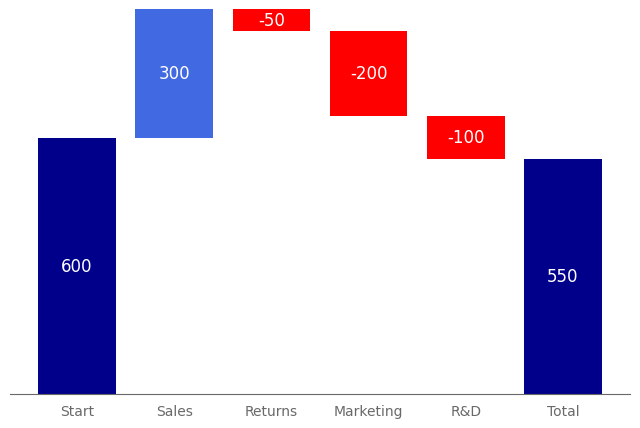

In [ ]:
import numpy as np
fig, ax = plt.subplots(figsize=(8, 5))

# definição de cor das barras
# Usar numpy.where para as condições de positivo e negativo
# numpy.where(condição, valor_se_verdadeiro, valor_se_falso)
df['color'] = np.where(df['Amount'] > 0, 'royalblue', 'red')

# Alterar o primeiro e o último valor da coluna 'color'
df.loc[0, 'color'] = 'darkblue'  # Altera o primeiro valor (índice 0)
df.loc[df.index[-1], 'color'] = 'darkblue'  # Altera o último valor

# código para o gráfico de barras
rects = ax.bar(df['Category'], df['Amount'], bottom=df['Position'], color=df['color'])

# colocando o valor dentro das barras
ax.bar_label(rects, label_type='center', color='white', fontsize=12)

# Ocultando os ticks do eixo x, mas mantendo os labels
ax.tick_params(axis='x', which='both', bottom=False, top=False)

# remover eixo superior e direito
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.yticks([]);  # Removes all y-axis ticks and labels

# trocar a cor dos eixos
plt.gca().spines['bottom'].set_color('dimgray')
plt.gca().spines['left'].set_color('dimgray')

# troca a cor escala (ticks e labels)
plt.tick_params(colors='dimgray')



## Waterfall
- Texto indicando início e fim do ano, além dos valores adicionados e subtraídos
Feito adicionando dois subplots e utilizando o segundo subplot para criar os textos e as barras verticiais
- nomes das categorias com letra maiúscula

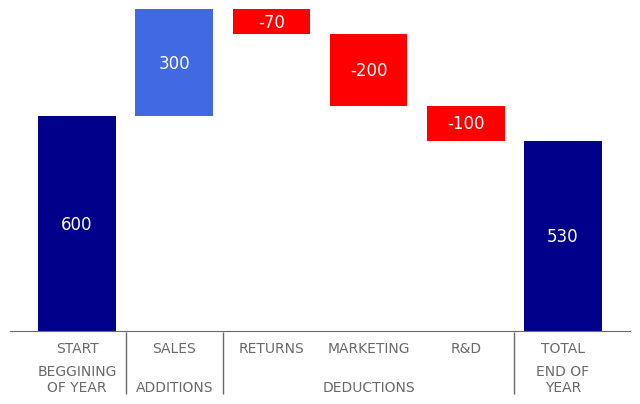

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# dados para exemplo
sample_data = {
    'Category': ['Start', 'Sales', 'Returns', 'Marketing', 'R&D'],
    'Amount': [600, 300, -50, -200, -100]
}
df = pd.DataFrame(sample_data)

# construção de linha e colunas para auxiliar na construção do gráfico

# 1. linha total
total = df['Amount'].sum()

aux_df = pd.DataFrame([['Total', total]], columns=['Category', 'Amount'])
df = pd.concat([df, aux_df])

# coluna posição relativa
df['Running_Total'] = df['Amount'].cumsum()
df['Shifted_Total'] = df['Running_Total'].shift(1).fillna(0) # primeira barra começa em 0
df['Position'] = df['Shifted_Total'] # barras começam na altura da barra anterior
df.loc[df.Category=='Total','Position'] = 0 # última barra começa em zero

# letras maiusculas nas categorias
df['Category'] = df['Category'].str.upper()


# Plotting the customized waterfall chart
fig, ax = plt.subplots(nrows=2,
                       ncols=1,
                       figsize=(8, 5),
                       gridspec_kw={'height_ratios': [9.2, 0.8]}
                       )

# Usar numpy.where para as condições de positivo e negativo
# numpy.where(condição, valor_se_verdadeiro, valor_se_falso)
df['color'] = np.where(df['Amount'] > 0, 'royalblue', 'red')

# Alterar o primeiro e o último valor da coluna 'color'
df.loc[0, 'color'] = 'darkblue'  # Altera o primeiro valor (índice 0)
df.loc[df.index[-1], 'color'] = 'darkblue'  # Altera o último valor

# code for Bars
rects = ax[0].bar(df['Category'], df['Amount'], bottom=df['Position'], color=df['color'])
ax[0].bar_label(rects, label_type='center', color='white', fontsize=12)

# Ocultando os ticks do eixo x, mas mantendo os labels
ax[0].tick_params(axis='x', which='both', bottom=False, top=False)

# remover eixo superior, direito e esquerdo
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[0].set_yticks([]);  # Removes all y-axis ticks and labels

# trocar a cor dos eixos
ax[0].spines['bottom'].set_color('dimgray')

# troca a cor escala (ticks e labels)
ax[0].tick_params(colors='dimgray')


# segundo grafico - usamos apenas os ticks e os labels como um segundo eixo
# remover eixo superior, direito e esquerdo
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[1].set_yticks([]);  # Remove todos y-axis ticks e labels


left, right = ax[0].get_xlim() # para usar o mesmo intervalo no eixo x utilizado no grafico princial
ax[1].set_xlim([left, right])

# print(left, right) # usar para ajudar a identificar onde estão localizadas as barras, a primeira está no zero

# posições das linhas verticais
# segue o mesmo eixo das barras, primeira barra 0, segunda barra 1, ...
# aqui primeira linha esta no 0.5, ajustar as demais de acordo com o desejado, para dividir os valores positivos e negativos e o final
ax[1].set_xticks([0.5, 1.5, 4.5],['', '', ''])  # para colocar as linhas verticais grandes
ax[1].tick_params(axis='x', length=45, width=1) # usar o parametro length para ajustar a barra caso fique grande ou para de encontar no eixo x do grafico principal

# Mude a direção dos ticks para "in" (dentro)
# no eixo x:
ax[1].tick_params(axis='x', direction='in')

# troca a cor escala (ticks e labels)
ax[1].tick_params(colors='dimgray')

# nomes descritivos para indicar o início, o fim, os acrécimos e decrescimos
# posições no eixo x, igual ao utilizado nas barras, primeira barra 0, segundo 1, ...
ax[1].text(0, 0.0, 'BEGGINING\nOF YEAR', color = 'dimgray',
           #fontsize=14,
           ha='center',
           va='bottom');
ax[1].text(5, 0.0, 'END OF\nYEAR', color = 'dimgray',
           #fontsize=14,
           ha='center',
           va='bottom');
ax[1].text(1, 0.0, 'ADDITIONS', color = 'dimgray',
           #fontsize=14,
           ha='center',
           va='bottom');
ax[1].text(3, 0.0, 'DEDUCTIONS', color = 'dimgray',
           #fontsize=14,
           ha='center',
           va='bottom');

## Waterfall
- Texto indicando início e fim do ano, além dos valores adicionados e subtraídos
Feito adicionando dois subplots e utilizando o segundo subplot para criar os textos e as barras verticiais.
- Título

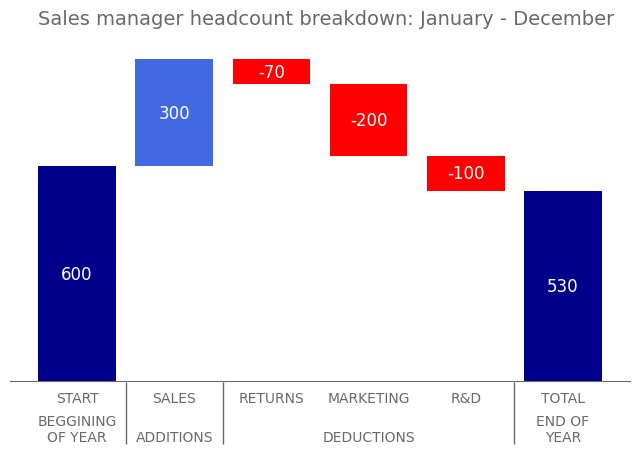

In [ ]:
# versao com título
#

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# below is the Sample data
sample_data = {
    'Category': ['Start', 'Sales', 'Returns', 'Marketing', 'R&D'],
    'Amount': [600, 300, -70, -200, -100]
}
df = pd.DataFrame(sample_data)


# criar a categoria que tem o valor total
total = df['Amount'].sum()

aux_df = pd.DataFrame([['Total', total]], columns=['Category', 'Amount'])
df = pd.concat([df, aux_df])

# Criar a coluna que será utilizada como posição relativa das barras
df['Running_Total'] = df['Amount'].cumsum()
df['Shifted_Total'] = df['Running_Total'].shift(1).fillna(0)
df['Position'] = df['Shifted_Total']
df.loc[df.Category=='Total','Position'] = 0

# letras maiusculas nas categorias
df['Category'] = df['Category'].str.upper()


# Plotting the customized waterfall chart
fig, ax = plt.subplots(nrows=2,
                       ncols=1,
                       figsize=(8, 5),
                       gridspec_kw={'height_ratios': [9.2, 0.8]}
                       )

# Usar numpy.where para as condições de positivo e negativo
# numpy.where(condição, valor_se_verdadeiro, valor_se_falso)
df['color'] = np.where(df['Amount'] > 0, 'royalblue', 'red')

# Alterar o primeiro e o último valor da coluna 'color'
df.loc[0, 'color'] = 'darkblue'  # Altera o primeiro valor (índice 0)
df.loc[df.index[-1], 'color'] = 'darkblue'  # Altera o último valor

# códido para o gráfico de barras
rects = ax[0].bar(df['Category'], df['Amount'], bottom=df['Position'], color=df['color'])
ax[0].bar_label(rects, label_type='center', color='white', fontsize=12)

# Ocultando os ticks do eixo x, mas mantendo os labels
ax[0].tick_params(axis='x', which='both', bottom=False, top=False)

# remover eixo superior, direito e esquerdo
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[0].set_yticks([]);  # Remove todos y-axis ticks e labels

# trocar a cor dos eixos
ax[0].spines['bottom'].set_color('dimgray')

# troca a cor escala (ticks e labels)
ax[0].tick_params(colors='dimgray')


# segundo grafico - usamos apenas os ticks e os labels como um segundo eixo
# remover eixo superior, direito e esquerdo
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[1].set_yticks([]);  # Removes all y-axis ticks and labels


left, right = ax[0].get_xlim() # para usar o mesmo intervalo no eixo x utilizado no grafico princial
ax[1].set_xlim([left, right])

# print(left, right) # usar para ajudar a identificar onde estão localizadas as barras, a primeira está no zero

# posições das linhas verticais
# segue o mesmo eixo das barras, primeira barra 0, segunda barra 1, ...
# aqui primeira linha esta no 0.5, ajustar as demais de acordo com o desejado, para dividir os valores positivos e negativos e o final
ax[1].set_xticks([0.5, 1.5, 4.5],['', '', ''])  # para colocar as linhas verticais grandes
ax[1].tick_params(axis='x', length=45, width=1) # usar o parametro length para ajustar a barra caso fique grande ou para de encontar no eixo x do grafico principal

# Muda a direção dos ticks para "in" (dentro)
# no eixo x:
ax[1].tick_params(axis='x', direction='in')

# troca a cor escala (ticks e labels)
ax[1].tick_params(colors='dimgray')

# nomes descritivos para indicar o início, o fim, os acrécimos e decrescimos
# posições no eixo x, igual ao utilizado nas barras, primeira barra 0, segundo 1, ...
ax[1].text(0, 0.0, 'BEGGINING\nOF YEAR', color = 'dimgray',
           #fontsize=14,
           ha='center',
           va='bottom');
ax[1].text(5, 0.0, 'END OF\nYEAR', color = 'dimgray',
           #fontsize=14,
           ha='center',
           va='bottom');
ax[1].text(1, 0.0, 'ADDITIONS', color = 'dimgray',
           #fontsize=14,
           ha='center',
           va='bottom');
ax[1].text(3, 0.0, 'DEDUCTIONS', color = 'dimgray',
           #fontsize=14,
           ha='center',
           va='bottom');

# Título
fig.suptitle('Sales manager headcount breakdown: January - December',
             fontsize=14,
             #fontweight='bold',
             color = 'dimgray',
             x=0.16, # if x=0.1: We are telling Matplotlib to place the anchor point for the title at 10% of the figure's width from the left side.
             horizontalalignment='left');